# CSE587 Project Part I
## Exploratory Data Analysis

In [1]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt

### Extract Information from a Link

In [2]:
# One column is composed of LinkedIn links. We can recover an approximation of the job title by removing characters from the link
# Inputs a link and outputs an approximation of the job title
def clean_link(link):
    link = str(link)
    index = len(link)-1

    # Accumulator
    job = ""
    # Do not include numbers, dashes, or odd characters in a job title
    prohibited_chars = ["%", "-", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

    # Work starting from the back. The job name is ended by a hypen character and begins after a slash
    start_transcribing = False
    while index != 0:
        # Search for the last hyphen in the link because it's what ends the job title
        if not start_transcribing and link[index] == '-':
            start_transcribing = True
        # Find the last slash because it comes right before the job title
        elif start_transcribing and link[index] == '/':
            # The `job` string is built in reverse, so reverse it when all the valuable information is garnered from the link
            job = job[::-1]
            break
        # While the iteration is still going through characters in the job
        elif start_transcribing:
            # Add the letters that make up the job title
            if link[index] not in prohibited_chars:
                job = job+str(link[index])
            # Hyphens represent spaces while in the job title
            elif link[index] == '-':
                job = job + ' '
        index = index - 1

    # Sometimes the job title notes WHERE the job is, when we only want WHAT the job is.
    # So, if there's a word 'at' anywhere, truncate before 'at' to just get the job.
    truncate = False
    for i in range(len(job)):
        if i+3 < len(job):
            if job[i] == ' ' and job[i+1] == 'a' and job[i+2] == 't' and job[i+3] == ' ' and i > 0:
                truncate = i
                break
        
    # Only keep the information we want (no 'at ____')
    if truncate:
        job = job[0:truncate]

    return job

### Read the dataset into memory

In [3]:
df = pd.read_csv("job_skills.csv",sep=',')

# Recover the approximate job names from the links
df["job_name"] = df["job_link"].apply(clean_link)

# Take the job names and the job skills, which are already in excellent form
df = df.drop(columns=["job_link"])[["job_name", "job_skills"]]

In [4]:
# Save a copy if necessary for manual inspection
df.to_csv("output.csv", index=False, mode='w')

### EDA - Most Common Word in Job Titles

In [5]:
# Create a word count for all of the job names
words = {}
for name in df["job_name"]:
    for word in name.split():
        if word not in words:
            words[word] = 1
        else:
            words[word] = words[word] + 1

# Remove all entries that are only used once because they likely don't exist and are just noise from the approximation
pop_me = []
for key in words:
    if words[key] == 1:
        pop_me.append(key)

for key in pop_me:
    words.pop(key, None)

In [6]:
# Reverse the words by the highest to lowest frequency
sorted_words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True))

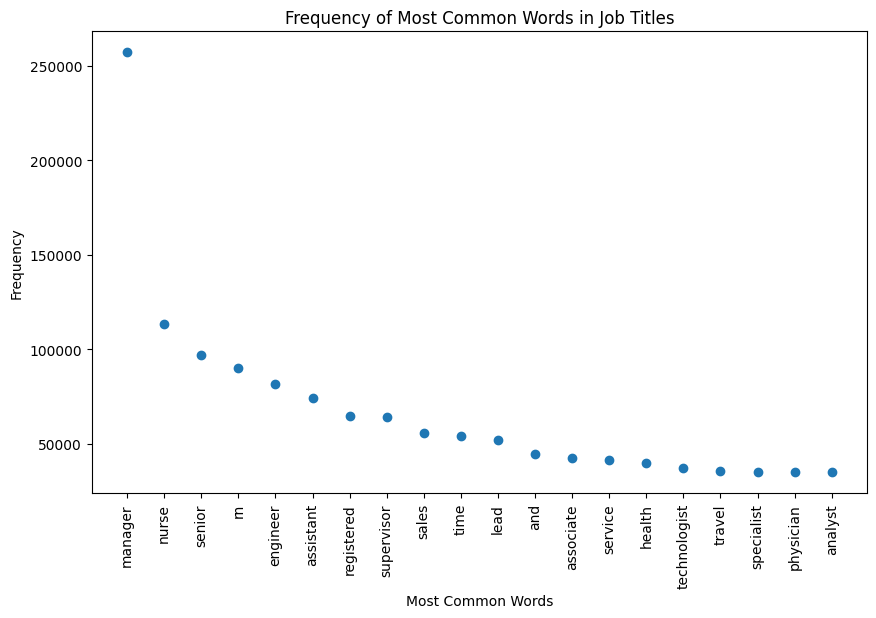

In [7]:
# Plot the highest ten words in job titles
x,y = [], []
i = 0
for key in sorted_words:
    x.append(key)
    y.append(sorted_words[key])
    i += 1
    if i == 20:
        break

plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.title("Frequency of Most Common Words in Job Titles")
plt.xlabel("Most Common Words")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

### EDA - Most Common Skills

In [8]:
# Now that we've gotten the info we need from all the job name approximations, drop the job names that have no corresponding skills
df = df.dropna(axis=0)
count = 0
for elem in df.isna()["job_skills"]:
    if elem:
        count = count + 1

# Verify it is dropped
if count == 0:
    print("no null values left")

no null values left


In [9]:
# Create a word count for all of the skills
skills = {}
for line in df["job_skills"]:
    
    # Get each skill
    line = line.split(',')

    for skill in line:
        # Remove leading or trailing spaces
        if skill[0] == ' ':
            skill = skill[1:len(skill)]
        elif skill[len(skill)-1] == ' ':
            skill = skill[0:len(skill)-1]
        skill = skill.lower()

        # fix a linkedin error by combining these
        if skill == "problemsolving":
            skill = "problem solving"

        # Create a dict of frequency of skills
        if skill in skills:
            skills[skill] = skills[skill] + 1
        else:
            skills[skill] = 1

In [10]:
# Reverse the skills by the highest to lowest frequency
sorted_skills = dict(sorted(skills.items(), key=lambda item: item[1], reverse=True))

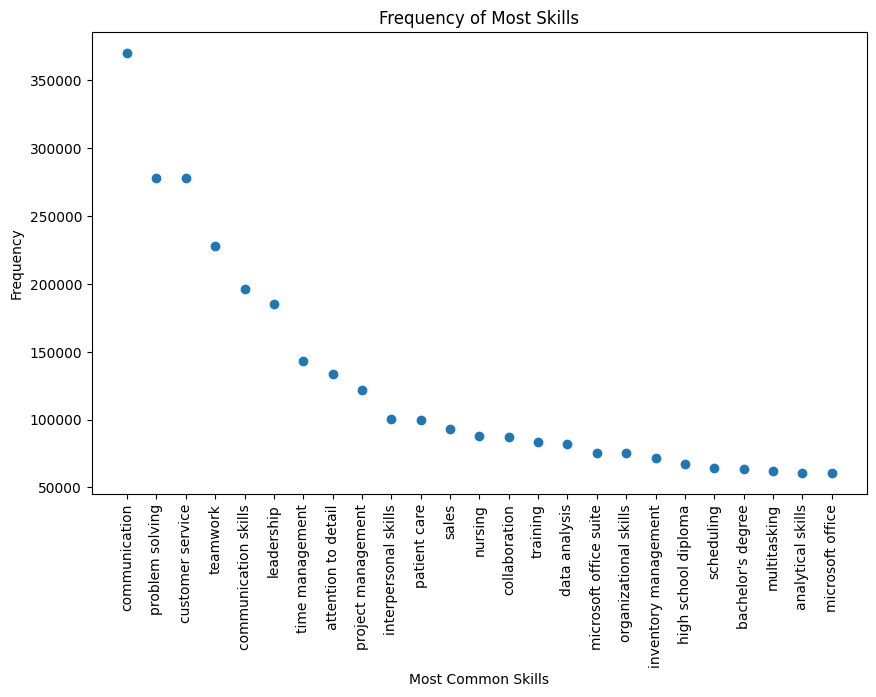

In [11]:
# Plot the highest skills
x,y = [], []
i = 0
for key in sorted_skills:
    x.append(key)
    y.append(sorted_skills[key])
    i += 1
    if i == 25:
        break

plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.title("Frequency of Most Skills")
plt.xlabel("Most Common Skills")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

In [12]:
# Create a word count for all of the job names
jobs = {}
for line in df["job_name"]:    
    if line in jobs:
        jobs[line] = jobs[line] + 1
    else:
           jobs[line] = 1

# Remove niche job postings that are clearly posted everywhere by one business
jobs.pop("guest advocate cashier or front of store attendant cart attendant t", None)
jobs.pop("beauty advisor inside sales sally beauty ", None)
jobs.pop("travel allied health professional ct technologist", None)
jobs.pop("on demand guest advocate cashier general merchandise fulfillment food and beverage style t", None)

1685

In [13]:
sorted_jobs = dict(sorted(jobs.items(), key=lambda item: item[1], reverse=True))

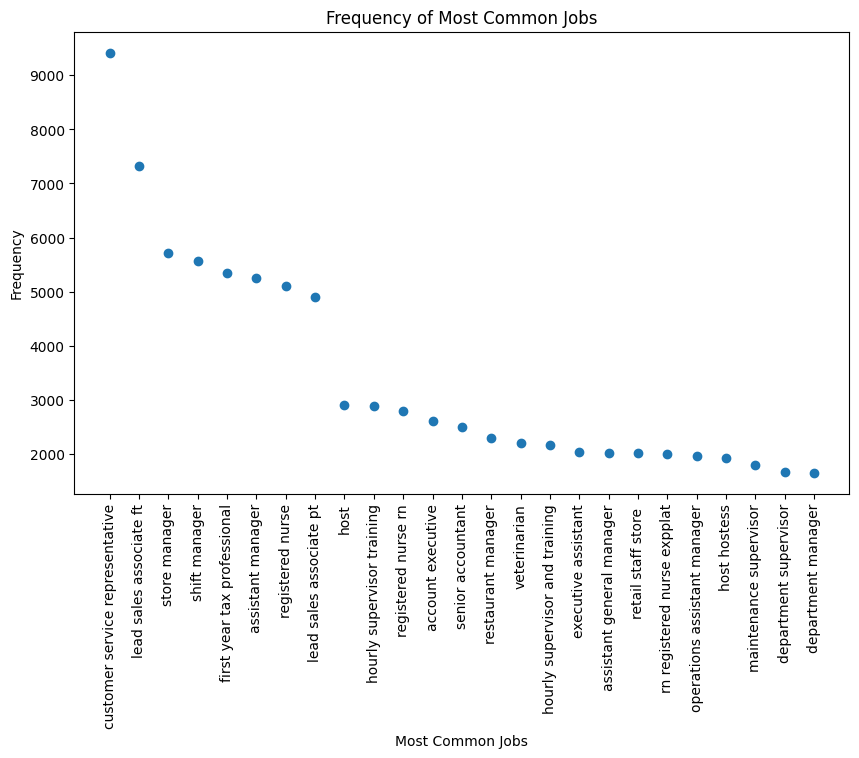

In [14]:
# Plot the highest job titles
x,y = [], []
i = 0
for key in sorted_jobs:
    x.append(key)
    y.append(sorted_jobs[key])
    i += 1
    if i == 25:
        break

plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.title("Frequency of Most Common Jobs")
plt.xlabel("Most Common Jobs")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()